In [1]:
import pandas as pd
import numpy as np
import warnings 

In [2]:
path='Skin Cancer/mnist ham1000/hmnist_28_28_RGB.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head(5)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [5]:
df.tail(5)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [6]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

D:\Python310\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
print(len(train_set))

8012


In [8]:
print(len(test_set))

2003


In [9]:
df.label.unique()

array([4, 2, 1, 6, 0, 5, 3], dtype=int64)

In [10]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),
        }

In [11]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [12]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


<Axes: ylabel='count'>

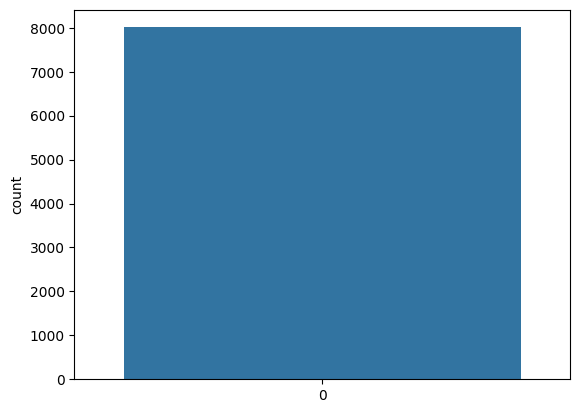

In [13]:
import seaborn as sns

sns.countplot(train_set['label'])

In [14]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

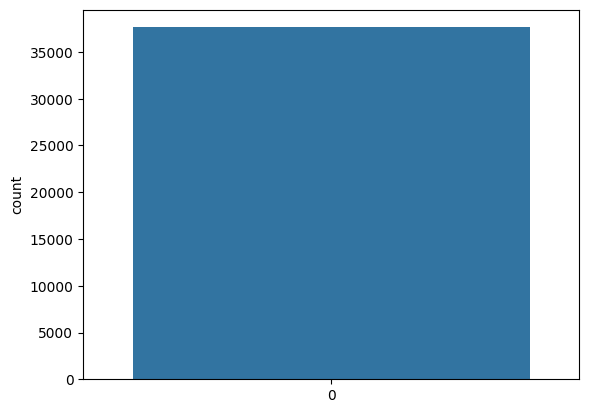

In [15]:
sns.countplot(y_train)

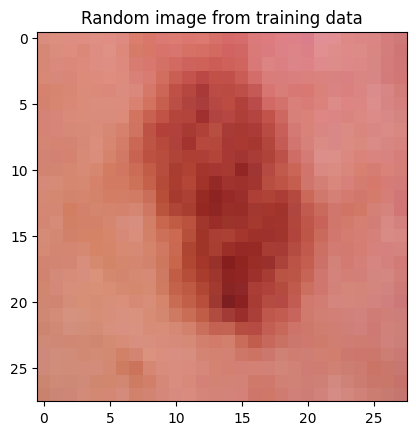

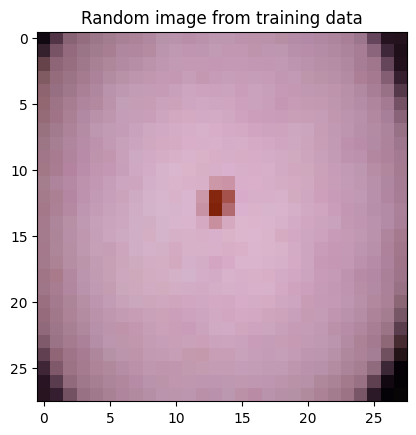

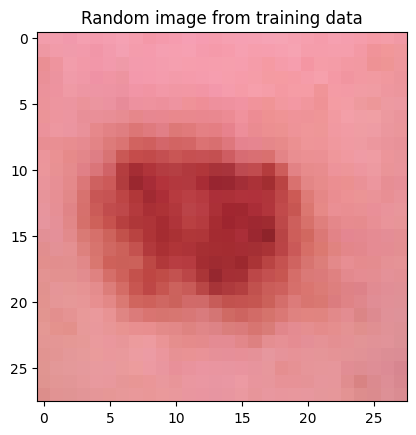

In [16]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)

x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [18]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0

In [19]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

In [20]:
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

In [21]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/50
235/236 [============================>.] - ETA: 0s - loss: 1.1184 - accuracy: 0.6100WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 22s 72ms/step - loss: 1.1180 - accuracy: 0.6101 - val_loss: 1.9589 - val_accuracy: 0.3476
Epoch 2/50
235/236 [============================>.] - ETA: 0s - loss: 0.3977 - accuracy: 0.8689WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 17s 72ms/step - loss: 0.3975 - accuracy: 0.8690 - val_loss: 2.1043 - val_accuracy: 0.3035
Epoch 3/50
235/236 [============================>.] - ETA: 0s - loss: 0.2512 - accuracy: 0.9154WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 18s 78ms/step - loss: 0.2515 - accuracy: 0.9153 - val_loss: 2.0913 - val_accuracy: 0.2848
Epoch 4/50
235/236 [============================>.] - ETA: 0s - loss: 0.2017 - accuracy: 0.9325WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 17s 72ms/step - loss: 0.2020 - accuracy: 0.9324 - val_loss: 0.8452 - val_accuracy: 0.6342
Epoch 5/50
236/236 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.9441WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 67ms/step - loss: 0.1584 - accuracy: 0.9441 - val_loss: 1.2121 - val_accuracy: 0.5416
Epoch 6/50
235/236 [============================>.] - ETA: 0s - loss: 0.1378 - accuracy: 0.9524WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.1379 - accuracy: 0.9524 - val_loss: 0.9869 - val_accuracy: 0.5523
Epoch 7/50
235/236 [============================>.] - ETA: 0s - loss: 0.1101 - accuracy: 0.9620WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 64ms/step - loss: 0.1103 - accuracy: 0.9620 - val_loss: 1.0876 - val_accuracy: 0.6308
Epoch 8/50
235/236 [============================>.] - ETA: 0s - loss: 0.1014 - accuracy: 0.9647WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.1014 - accuracy: 0.9647 - val_loss: 1.1555 - val_accuracy: 0.5917
Epoch 9/50
236/236 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9671WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 64ms/step - loss: 0.0928 - accuracy: 0.9671 - val_loss: 0.6452 - val_accuracy: 0.7622
Epoch 10/50
235/236 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9712WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 17s 71ms/step - loss: 0.0813 - accuracy: 0.9711 - val_loss: 0.3706 - val_accuracy: 0.8502
Epoch 11/50
235/236 [============================>.] - ETA: 0s - loss: 0.0999 - accuracy: 0.9658WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 70ms/step - loss: 0.0999 - accuracy: 0.9658 - val_loss: 0.6803 - val_accuracy: 0.7734
Epoch 12/50
235/236 [============================>.] - ETA: 0s - loss: 0.0687 - accuracy: 0.9760WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 17s 71ms/step - loss: 0.0687 - accuracy: 0.9760 - val_loss: 0.4092 - val_accuracy: 0.8179
Epoch 13/50
235/236 [============================>.] - ETA: 0s - loss: 0.0489 - accuracy: 0.9827WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 69ms/step - loss: 0.0490 - accuracy: 0.9827 - val_loss: 0.4427 - val_accuracy: 0.8350
Epoch 14/50
235/236 [============================>.] - ETA: 0s - loss: 0.0677 - accuracy: 0.9772WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 68ms/step - loss: 0.0677 - accuracy: 0.9772 - val_loss: 1.3621 - val_accuracy: 0.6652
Epoch 15/50
235/236 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9846WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 68ms/step - loss: 0.0472 - accuracy: 0.9845 - val_loss: 0.5598 - val_accuracy: 0.8256
Epoch 16/50
235/236 [============================>.] - ETA: 0s - loss: 0.0646 - accuracy: 0.9788WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 67ms/step - loss: 0.0646 - accuracy: 0.9788 - val_loss: 0.2329 - val_accuracy: 0.9034
Epoch 17/50
235/236 [============================>.] - ETA: 0s - loss: 0.0304 - accuracy: 0.9893WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.9236 - val_accuracy: 0.6987
Epoch 18/50
235/236 [============================>.] - ETA: 0s - loss: 0.0418 - accuracy: 0.9867WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.2237 - val_accuracy: 0.9223
Epoch 19/50
235/236 [============================>.] - ETA: 0s - loss: 0.0419 - accuracy: 0.9859WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 68ms/step - loss: 0.0420 - accuracy: 0.9859 - val_loss: 0.5283 - val_accuracy: 0.8314
Epoch 20/50
236/236 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9874WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.4597 - val_accuracy: 0.8440
Epoch 21/50
235/236 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9839WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 14s 61ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.4243 - val_accuracy: 0.8444
Epoch 22/50
235/236 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9905WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0279 - accuracy: 0.9905 - val_loss: 0.2085 - val_accuracy: 0.9216
Epoch 23/50
235/236 [============================>.] - ETA: 0s - loss: 0.0356 - accuracy: 0.9882WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 66ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.2405 - val_accuracy: 0.9202
Epoch 24/50
235/236 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9937WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.2932 - val_accuracy: 0.8944
Epoch 25/50
235/236 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9896WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0305 - accuracy: 0.9895 - val_loss: 1.4981 - val_accuracy: 0.6953
Epoch 26/50
235/236 [============================>.] - ETA: 0s - loss: 0.0281 - accuracy: 0.9907WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 18s 76ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.1203 - val_accuracy: 0.9612
Epoch 27/50
235/236 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9915WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 18s 76ms/step - loss: 0.0252 - accuracy: 0.9915 - val_loss: 0.1370 - val_accuracy: 0.9509
Epoch 28/50
235/236 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9931WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 68ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.3086 - val_accuracy: 0.8939
Epoch 29/50
235/236 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9898WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0305 - accuracy: 0.9898 - val_loss: 0.4184 - val_accuracy: 0.8553
Epoch 30/50
235/236 [============================>.] - ETA: 0s - loss: 0.0140 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0276 - val_accuracy: 0.9915
Epoch 31/50
235/236 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9866WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 17s 72ms/step - loss: 0.0422 - accuracy: 0.9866 - val_loss: 0.2482 - val_accuracy: 0.9026
Epoch 32/50
235/236 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9944WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 70ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0455 - val_accuracy: 0.9822
Epoch 33/50
235/236 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.1602 - val_accuracy: 0.9478
Epoch 34/50
235/236 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9942WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 66ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.3373 - val_accuracy: 0.8994
Epoch 35/50
235/236 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9932WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 67ms/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.3251 - val_accuracy: 0.8876
Epoch 36/50
235/236 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9933WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 69ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.1649 - val_accuracy: 0.9376
Epoch 37/50
235/236 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 68ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.2687 - val_accuracy: 0.9139
Epoch 38/50
235/236 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9937WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 66ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.3297 - val_accuracy: 0.8990
Epoch 39/50
235/236 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.5356 - val_accuracy: 0.8579
Epoch 40/50
235/236 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9930WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.1348 - val_accuracy: 0.9485
Epoch 41/50
235/236 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 69ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.4082 - val_accuracy: 0.8903
Epoch 42/50
235/236 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9937WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 16s 68ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.5673 - val_accuracy: 0.8533
Epoch 43/50
235/236 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 62ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0419 - val_accuracy: 0.9886
Epoch 44/50
235/236 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0199 - accuracy: 0.9941 - val_loss: 0.5270 - val_accuracy: 0.8381
Epoch 45/50
235/236 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 0.9966WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 61ms/step - loss: 0.0115 - accuracy: 0.9966 - val_loss: 0.1034 - val_accuracy: 0.9631
Epoch 46/50
235/236 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9953WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.2323 - val_accuracy: 0.9345
Epoch 47/50
235/236 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.3124 - val_accuracy: 0.9089
Epoch 48/50
235/236 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 65ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 1.4319 - val_accuracy: 0.6582
Epoch 49/50
235/236 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 63ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.0800 - val_accuracy: 0.9729
Epoch 50/50
235/236 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 15s 64ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0690 - val_accuracy: 0.9782
Duration: 0:13:16.088333


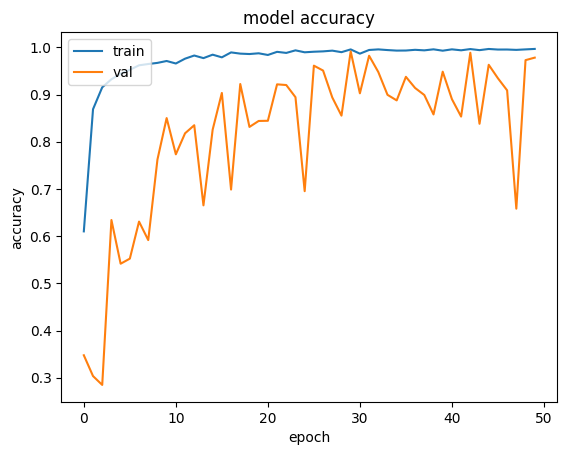

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

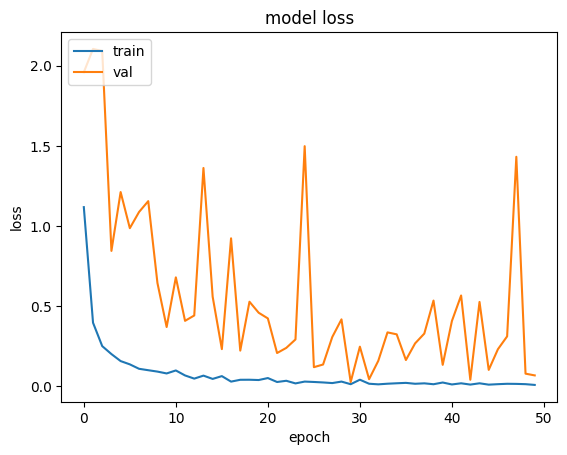

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model.save('Models//Skin Cancer.h5')

D:\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 1s 5ms/step - loss: 1.6465 - accuracy: 0.7104


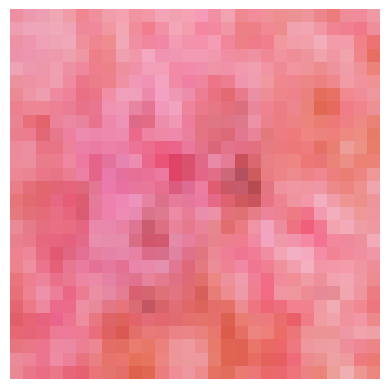

1/1 [==============================] - 0s 381ms/step
[9.9998629e-01 2.4212432e-07 2.2127449e-06 5.1311389e-08 4.0416367e-06
 1.9337367e-07 6.9913654e-06]
('akiec', 'actinic keratoses and intraepithelial carcinomae')
True label: akiec



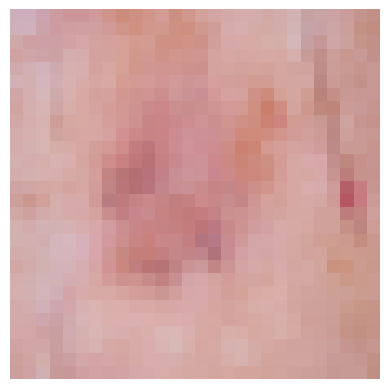

1/1 [==============================] - 0s 23ms/step
[6.7192785e-05 9.9756795e-01 6.5290864e-04 4.2241677e-06 1.1849727e-03
 2.5152071e-06 5.2015536e-04]
('bcc', 'basal cell carcinoma')
True label: bcc



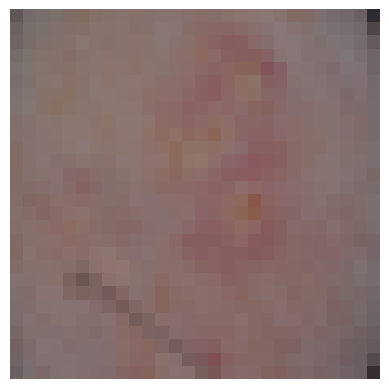

1/1 [==============================] - 0s 17ms/step
[2.9754443e-05 3.0013977e-04 1.5749305e-03 3.1824045e-05 9.9408853e-01
 5.7907739e-05 3.9169337e-03]
('nv', ' melanocytic nevi')
True label: bkl



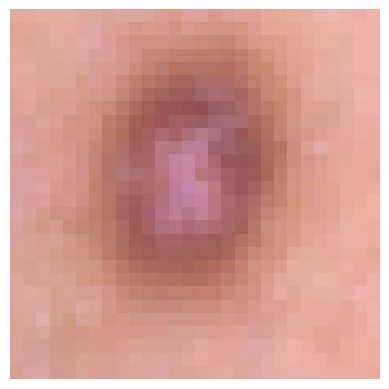

1/1 [==============================] - 0s 19ms/step
[2.5307356e-06 3.8198614e-06 2.5278121e-06 9.9998331e-01 1.2409165e-06
 3.6405111e-06 3.0009867e-06]
('df', 'dermatofibroma')
True label: df



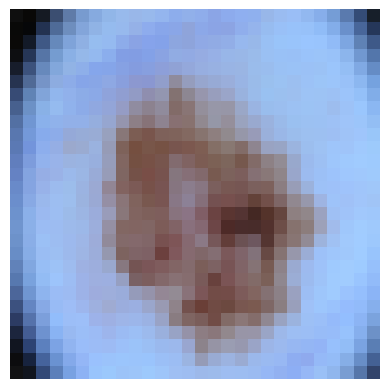

1/1 [==============================] - 0s 17ms/step
[2.2565639e-05 2.8141259e-04 1.0373300e-03 8.1601465e-06 8.0527931e-02
 2.0233543e-04 9.1792035e-01]
('mel', 'melanoma')
True label: mel



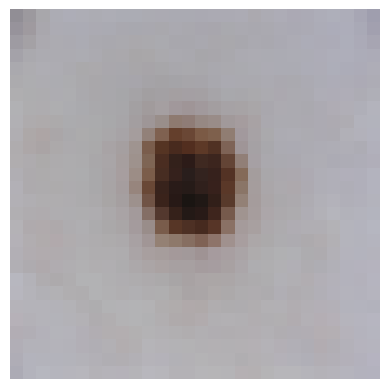

1/1 [==============================] - 0s 31ms/step
[1.6420216e-05 1.0519004e-05 4.2680738e-05 8.4883495e-06 9.9920589e-01
 2.9696754e-05 6.8634795e-04]
('nv', ' melanocytic nevi')
True label: nv



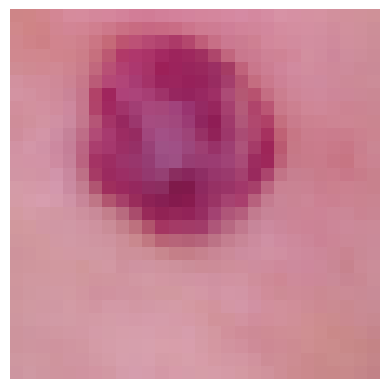

1/1 [==============================] - 0s 27ms/step
[8.8408507e-07 4.9064415e-06 8.9257549e-07 3.1482846e-06 2.6254802e-06
 9.9998343e-01 4.1454678e-06]
('vasc', ' pyogenic granulomas and hemorrhage')
True label: vasc



In [26]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

img_list = ['Skin Cancer/isic 2019/dataset/train/ak/ISIC_0024468.jpg',
           'Skin Cancer/isic 2019/dataset/train/bcc/ISIC_0024331.jpg',
           'Skin Cancer/isic 2019/dataset/train/bkl/ISIC_0012090_downsampled.jpg',
           'Skin Cancer/isic 2019/dataset/train/df/ISIC_0024318.jpg',
           'Skin Cancer/isic 2019/dataset/train/mel/ISIC_0000002.jpg',
           'Skin Cancer/isic 2019/dataset/train/nv/ISIC_0000001.jpg',
           'Skin Cancer/isic 2019/dataset/train/vasc/ISIC_0024370.jpg']

true_labels = ['akiec',
              'bcc',
              'bkl',
              'df',
              'mel',
              'nv',
              'vasc']

for x in range(len(img_list)):
    image = PIL.Image.open(img_list[x])
    image = image.resize((28, 28))
    
    img = np.array(image)
    
    #img = img.reshape(-1, 28, 28, 3)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    img = x_test[1]
    img = np.array(image).reshape(-1, 28, 28, 3)
    result = model.predict(img)
    print(result[0])
    result = result.tolist()
    max_prob = max(result[0])
    class_ind = result[0].index(max_prob)
    print(classes[class_ind])
    print(f"True label: {true_labels[x]}")
    print()